# Marketing Campaign Predictor

This notebook uses a logistic regression model to predict whether a customer will predict if a customer will respond positively to a marketing campaign based on different features.


## Install Required Libaries
Installing required libraries for Jupyter Notebooks and Google Colab


In [15]:
%pip install pandas matplotlib seaborn scikit-learn requests ipywidgets Jinja2

## Importing Libraries and Downloading Files

Import the necessary libraries and download the CSV file from the provided URL link

### Libraries Used:
1. **pandas**: For handling and analyzing structured data
2. **matplotlib**: Used to create static and interactive visualizations
3. **scikit-learn**: Machine learning library for classification, regression, clustering algorithms
4. **requests**: Used to make HTTP requests for downloading file from the web
5. **seaborn**: Statistical data visualization
6. **ipywidget**: Used to create user interface
7. **IPython.display**: Tools display content

### Downloading and Saving the CSV File
CSV file was taken from [Kaggle Marketing Campaign Positive Response Prediction](https://www.kaggle.com/datasets/sujithmandala/marketing-campaign-positive-response-prediction?resource=download) loaded onto GitHub

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import requests
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

### Message to Evaluator

<mark> _This warning is related to making unverified HTTPS requests. It does not effect the code from running or functioning correctly. However I will below provide how to hide it. It will be commented out, however you can comment this in by **deleting** the "#"_ <mark>


In [11]:
#import warnings
#import urllib3

#urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [12]:
url = 'https://raw.githubusercontent.com/ivvle/c964_Task_2_Part_C/main/campaign_responses.csv'
response = requests.get(url)

with open('campaign_responses.csv', 'wb') as file:
    file.write(response.content)

file_path = 'campaign_responses.csv'
df = pd.read_csv(file_path)

/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [13]:
df.describe(include='all')

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
count,56.000000,56.000000,56,56.000000,56.000000,56,56,56.000000,56
unique,NaN,NaN,2,NaN,NaN,2,2,NaN,2
top,NaN,NaN,Male,NaN,NaN,Yes,Married,NaN,Yes
freq,NaN,NaN,28,NaN,NaN,43,28,NaN,28
mean,28.500000,36.214286,NaN,69017.857143,719.107143,NaN,NaN,1.285714,NaN
std,16.309506,7.088311,NaN,22784.756524,60.340753,NaN,NaN,1.186504,NaN
min,1.000000,25.000000,NaN,35000.000000,600.000000,NaN,NaN,0.000000,NaN
25%,14.750000,30.000000,NaN,48000.000000,677.500000,NaN,NaN,0.000000,NaN
50%,28.500000,35.500000,NaN,64500.000000,720.000000,NaN,NaN,1.000000,NaN
75%,42.250000,42.000000,NaN,90000.000000,770.000000,NaN,NaN,2.000000,NaN


In [16]:
# Display the DataFrame
print("Data Preview:")
styled_df = df.head().style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333333'), ('font-weight', 'bold')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid #ddd'), ('padding', '8px')]
    }],
    overwrite=False
).set_properties(**{'background-color': '#f9f9f9', 'color': '#333333'})

display(styled_df)

#Blank line for space
display(HTML("<br>"))

# Display the count of missing values
print("Missing Values Count:")
missing_values_df = df.isnull().sum().to_frame(name='Missing Values').reset_index().rename(columns={'index': 'Column'})
styled_missing_values = missing_values_df.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333333'), ('font-weight', 'bold')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid #ddd'), ('padding', '8px')]
    }],
    overwrite=False
).set_properties(**{'background-color': '#f9f9f9', 'color': '#333333'})

display(styled_missing_values)


Data Preview:


,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


Missing Values Count:


,Column,Missing Values
0,customer_id,0
1,age,0
2,gender,0
3,annual_income,0
4,credit_score,0
5,employed,0
6,marital_status,0
7,no_of_children,0
8,responded,0


### Data preparation

In [17]:
# Remove the customer_id column
df.drop(columns=['customer_id'], inplace=True)

In [18]:
df['responded'] = df['responded'].map({'No': 0, 'Yes': 1})
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['employed'] = df['employed'].map({'Yes': 1, 'No': 0})
df['marital_status'] = df['marital_status'].map({'Married': 1, 'Single': 0})

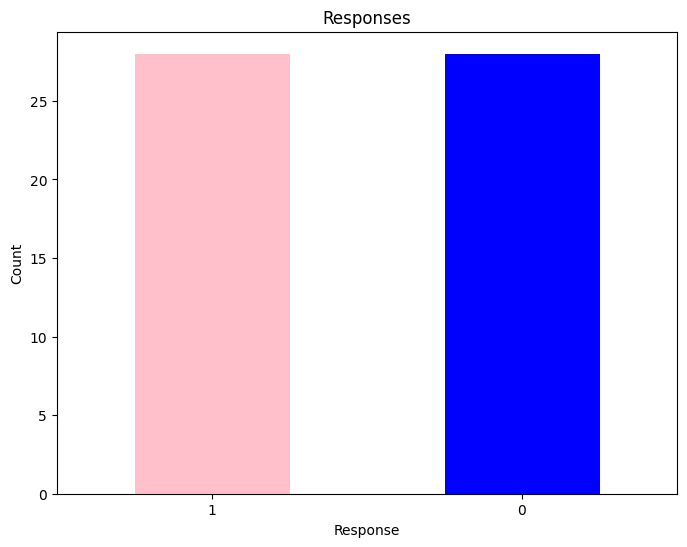

In [19]:
response_counts = df['responded'].value_counts()
plt.figure(figsize=(8, 6))
response_counts.plot.bar(color=['pink', 'blue'], rot=0)
plt.title('Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

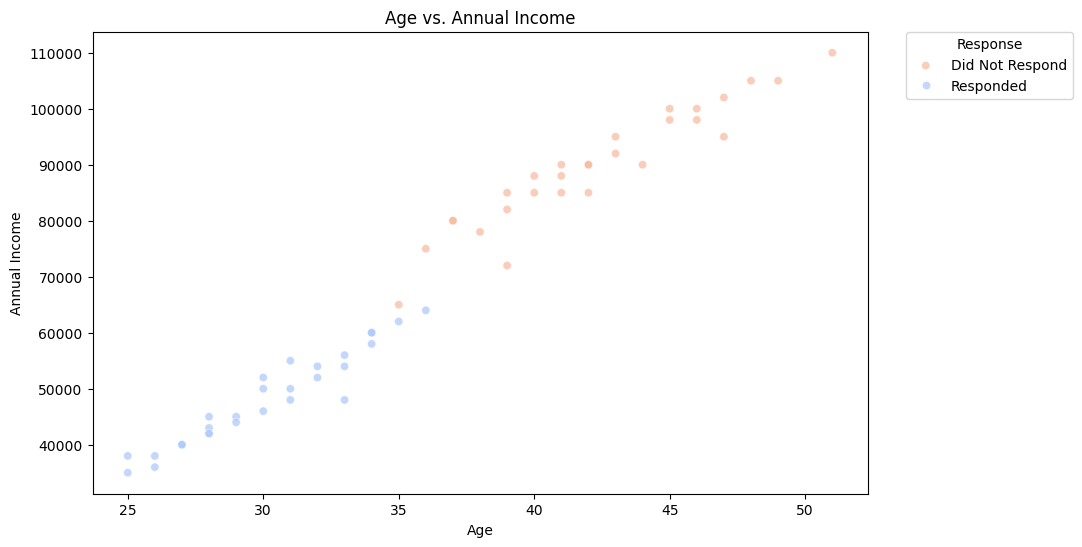

In [21]:
# Age vs Annual Income
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='age', y='annual_income', hue='responded', palette='coolwarm', alpha=0.7)
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Response', labels=['Did Not Respond', 'Responded'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

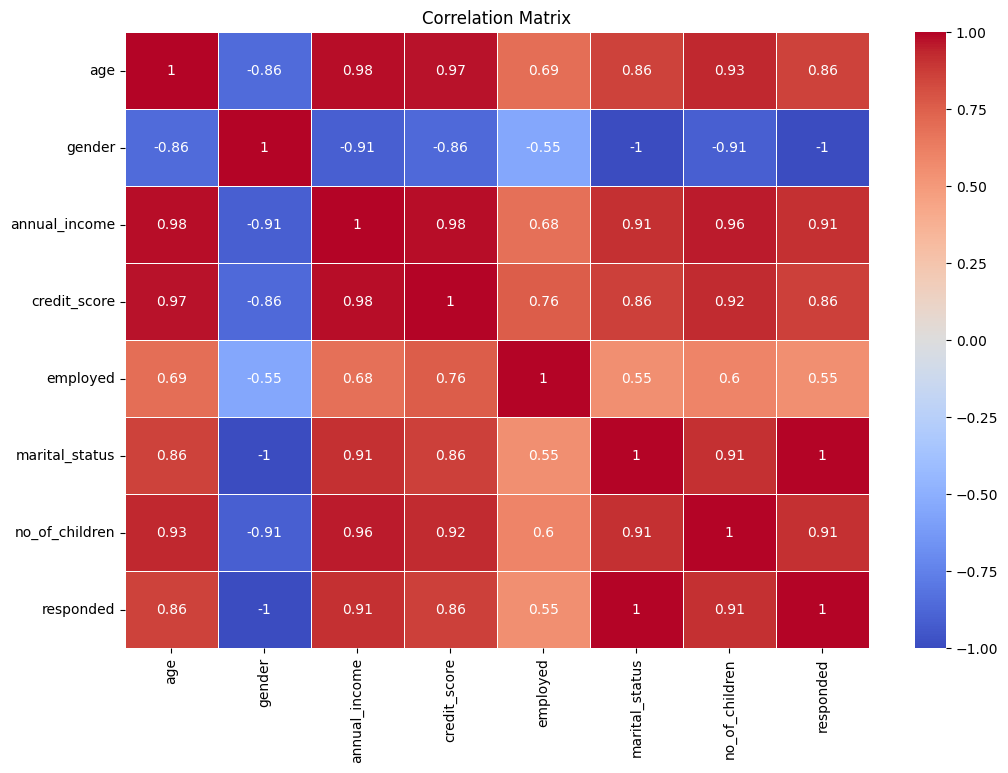

In [22]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Model Training

In [23]:
X = df.drop(columns=['responded'])
y = df['responded'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.9166666666666666
Confusion Matrix:
[[5 0]
 [1 6]]


## User Interface

In [24]:
# Define the user interface function
def predict_response(new_data):
    new_df = pd.DataFrame([new_data], columns=X.columns)
    response = model.predict(new_df)
    return 'Yes' if response[0] == 1 else 'No'

# Define widgets
age = widgets.IntText(description='Age:')
gender = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
annual_income = widgets.IntText(description='Annual Income:')
credit_score = widgets.IntText(description='Credit Score:')
employed = widgets.Dropdown(options=['Yes', 'No'], description='Employed:')
marital_status = widgets.Dropdown(options=['Married', 'Single'], description='Marital Status:')
no_of_children = widgets.IntText(description='No. of Children:')
output = widgets.Output()

# Define the function to handle button click
def on_button_clicked(b):
    with output:
        clear_output()
        gender_value = 0 if gender.value == 'Male' else 1
        employed_value = 1 if employed.value == 'Yes' else 0
        marital_status_value = 1 if marital_status.value == 'Married' else 0

        new_customer = {
            'age': age.value,
            'gender': gender_value,
            'annual_income': annual_income.value,
            'credit_score': credit_score.value,
            'employed': employed_value,
            'marital_status': marital_status_value,
            'no_of_children': no_of_children.value
        }

        prediction = predict_response(new_customer)
        print(f'The prediction for the customer\'s response is: {prediction}')

# Define the button
button = widgets.Button(description='Predict')
button.on_click(on_button_clicked)

# Display the widgets
display(age, gender, annual_income, credit_score, employed, marital_status, no_of_children, button, output)


IntText(value=0, description='Age:')

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

IntText(value=0, description='Annual Income:')

IntText(value=0, description='Credit Score:')

Dropdown(description='Employed:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Marital Status:', options=('Married', 'Single'), value='Married')

IntText(value=0, description='No. of Children:')

Button(description='Predict', style=ButtonStyle())

Output()